# Assignment 1 - Power Plant Prediction
Kyle Ah Von #57862609

## Summary
Predict the Electrical Energy Output (EP) using: Multiple Regression and SVM Regression

We are provided with the dataset including the Temperature, Ambient Pressure, Relative Humidity, Exhaust Vacuum, and Net Hourly Electrical Output. We are tasked with determining the best model to predict the Net Hourly Electrical Energy Output of the company out of Polynomial regressions or Support Vector Regression. 

We will make the analysis using visuals and r2 scores to evaluate which model is better. 

## Dataset Details

- **Total Data Points:** 9,568
- **Time Period:** 2006-2011
- **Frequency:** Hourly averages

## Features

The dataset includes the following features:

1. **Temperature (T)**
   - **Description:** The temperature of the ambient environment.
   - **Range:** 1.81°C to 37.11°C

2. **Ambient Pressure (AP)**
   - **Description:** The ambient pressure at the location of the power plant.
   - **Range:** 992.89 to 1033.30 millibar

3. **Relative Humidity (RH)**
   - **Description:** The relative humidity of the ambient environment.
   - **Range:** 25.56% to 100.16%

4. **Exhaust Vacuum (V)**
   - **Description:** The vacuum pressure in the exhaust system.
   - **Range:** 25.36 to 81.56 cm Hg

5. **Net Hourly Electrical Energy Output (EP)**
   - **Description:** The net electrical energy output of the power plant per hour.
   - **Range:** 420.26 to 495.76 MW



# Importing Libraries

In [93]:
# Data Manipulation
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations

# Data Visualization
import matplotlib.pyplot as plt  # For creating static, interactive, and animated visualizations
import seaborn as sns            # For statistical data visualization

# Machine Learning
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets
from sklearn.preprocessing import StandardScaler, MinMaxScaler , PolynomialFeatures # For feature scaling & polynomial regression
from sklearn.linear_model import LinearRegression  # For linear regression
from sklearn.svm import SVR  # For Support Vector Regression
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score  # For model evaluation metrics

## Import DataSet 

In [94]:
dataset = pd.read_csv('Power Plant Data.csv')

### Visualize dataset in table

In [95]:
# Set the float format to 2 decimal - data does not have more than 2 significant figures after decimal point
pd.options.display.float_format = '{:.2f}'.format

# Display the first few rows as sample
dataset.head()

,Ambient Temperature (C),Exhaust Vacuum (cm Hg),Ambient Pressure (milibar),Relative Humidity (%),Hourly Electrical Energy output (MW)
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


All the columns have numerical data. All the columns contain useful information for the model. 

## Review of Data
Primarily to check if we have missing data

In [96]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Ambient Temperature (C)               9568 non-null   float64
 1   Exhaust Vacuum (cm Hg)                9568 non-null   float64
 2   Ambient Pressure (milibar)            9568 non-null   float64
 3   Relative Humidity (%)                 9568 non-null   float64
 4   Hourly Electrical Energy output (MW)  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


Conveniently, there is no missing data in any rows, woohoo!
Also, there is no categorical data, there is no need to encode the data.

## Separate Inputs and Outputs

In [97]:
Y = dataset.iloc[:, 4] # sets last column as output
X = dataset.iloc[:, :4] # sets the first 4 columns as input


## Split data into Training and Testing 

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

#Visualize the training input data
X_train.describe()

,Ambient Temperature (C),Exhaust Vacuum (cm Hg),Ambient Pressure (milibar),Relative Humidity (%)
count,7654.00,7654.00,7654.00,7654.00
mean,19.64,54.32,1013.25,73.36
std,7.43,12.71,5.98,14.55
min,1.81,25.36,992.89,25.56
25%,13.56,41.67,1009.09,63.48
50%,20.34,52.30,1012.92,74.99
75%,25.66,66.54,1017.25,84.82
max,37.11,81.56,1033.30,100.16


## Scale data - Standardization
Since each input feature has a difference range of values, scaling the data would reduce the bias on features with bigger absolute values. 

In [99]:
sc_x = StandardScaler()

#Fit and transform
X_train_scaled = sc_x.fit_transform(X_train)
X_test_scaled = sc_x.transform(X_test)

#View Scaled data
print(X_train_scaled)


[[-1.75440309 -1.21216858  0.42112637  1.3027435 ]
 [ 0.41388954  0.88854693  0.23226259 -0.1942825 ]
 [-1.29005737 -1.15709364  0.83060976 -0.21559003]
 ...
 [-0.1419794  -1.16260113 -0.78392477 -0.32625174]
 [ 0.44619185 -0.73222983 -0.17387808 -1.54971652]
 [ 0.11509316 -0.36401453 -0.61010325 -0.17503699]]


## Regressions

### Simple Linear Regression Model 
In the case of multiple inputs, the model assigns a separate coefficient to each of the input features which are Ambient Temperature, Exhaust Vaccum, Ambient Pressure and Relative Humidity. These coefficients represent the weight or importance of each feature in predicting the output. 

The prediction is made by taking a linear combination of these features. The model then uses an optimization algorithm to find the best values for these coefficients that minimize the prediction error across the training data. 

In [100]:
# Apply linear regression
LinearRegModel = LinearRegression()
LinearRegModel.fit(X_train_scaled, y_train)

# Predict on test data
y_simple_pred_train = LinearRegModel.predict(X_train_scaled)
y_simple_pred_test = LinearRegModel.predict(X_test_scaled)

#Assess the accuracy of the model 
# Calculate metrics (r2_score)
r2_train = r2_score(y_train, y_simple_pred_train)
r2_test = r2_score(y_test, y_simple_pred_test)

print(r2_train)
print(r2_test)


0.9277745463518707
0.9321860060402446


### Polynomial Regression Model

In this section, we will up the complexity of the model by fitting a polynomial function. The code will iteration over a few polynomial degrees and spit out the results on a visualization.

P.S: A polynomial regression of degree 1 is the same as a linear regression

In [101]:
# Apply polynomial Regression

results = []

for degree in range(1, 9):
    #create and fit the polynomial regression model
    poly_reg = PolynomialFeatures(degree)
    X_poly = poly_reg.fit_transform(X_train_scaled)
    X_poly_test = poly_reg.transform(X_test_scaled)
    poly_model = LinearRegression()
    poly_model.fit(X_poly, y_train)

    # Make Predictions
    y_poly_pred_train = poly_model.predict(X_poly)
    y_poly_pred_test = poly_model.predict(X_poly_test)

    # Calculate metrics (r2_score)
    r2_train = r2_score(y_train, y_poly_pred_train)
    r2_test = r2_score(y_test, y_poly_pred_test)

    results.append({
        'Degree': degree,
        'R2 (Train)': r2_train, 
        'R2 (Test)': r2_test
    })

    #Convert results to a DataFrame
    results_df = pd.DataFrame(results)

    # Find the best model based on test R2 score
    best_model = results_df.loc[results_df['R2 (Test)'].idxmax()]

# Set the display option for pandas to show floats with 3 decimal places
pd.options.display.float_format = '{:.4f}'.format

print("Best Index: ")
print(best_model)
print(results_df)
    

Best Index: 
Degree       7.0000
R2 (Train)   0.9498
R2 (Test)    0.9488
Name: 6, dtype: float64
   Degree  R2 (Train)  R2 (Test)
0       1      0.9278     0.9322
1       2      0.9372     0.9404
2       3      0.9401     0.9436
3       4      0.9422     0.9450
4       5      0.9452     0.9481
5       6      0.9471     0.9487
6       7      0.9498     0.9488
7       8      0.9524     0.9212


It looks like polynomial with degree 7 has better accuracy predicting test values. The accuracy goes down after than index 7. 

## Visualize data
Create a visual of the results of the polynomial index optimization

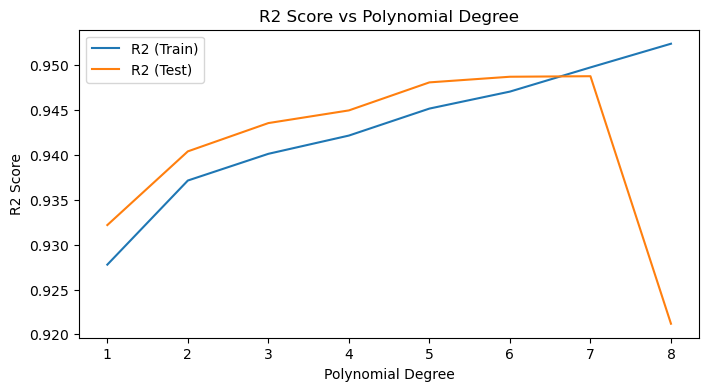

In [102]:
plt.figure(figsize=(8,4))
plt.plot(results_df['Degree'], results_df['R2 (Train)'], label='R2 (Train)')
plt.plot(results_df['Degree'], results_df['R2 (Test)'], label='R2 (Test)')
plt.xlabel('Polynomial Degree')
plt.ylabel('R2 Score')
plt.title('R2 Score vs Polynomial Degree')
plt.legend()
plt.show()

We can see that as we increase the polynomial degree, the model is overfitting the data, leading to the model being unable to predict unseen properly. This is why the r2 score on the train data keeps improving but the model is unable to properly predict values (blue line keeps increasing as opposed to the orange line which falls).

## SVM Regression

Now, let's run the Support Vector Machine Regression

In [103]:
SVMModel = SVR(kernel = 'rbf')
SVMModel.fit(X_train_scaled, y_train)

# test model 
y_pred = SVMModel.predict(X_test_scaled)
y_train_SVM = SVMModel.predict(X_train_scaled)

# Calculate metrics (r2_score)
r2_train = r2_score(y_train, y_poly_pred_train)
r2_test = r2_score(y_test, y_poly_pred_test)


## Update Visuals

Add the results of the SVM Regression

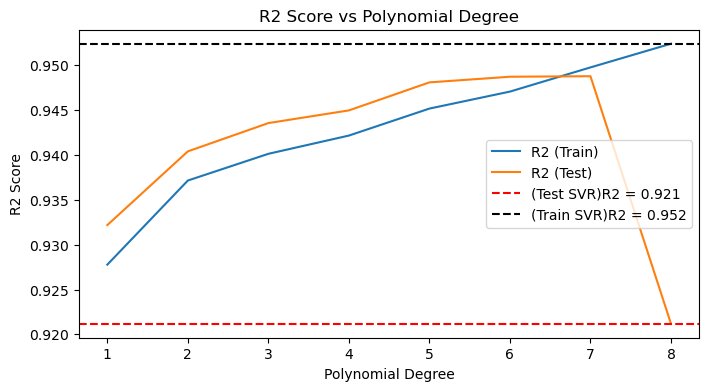

In [104]:
plt.figure(figsize=(8,4))
plt.plot(results_df['Degree'], results_df['R2 (Train)'], label='R2 (Train)')
plt.plot(results_df['Degree'], results_df['R2 (Test)'], label='R2 (Test)')

# Adding a horizontal line at a specific R2 score, e.g., R2 = 0.9
plt.axhline(y=r2_test, color='red', linestyle='--', label=f'(Test SVR)R2 = {r2_test:.3f}')
plt.axhline(y=r2_train, color='black', linestyle='--', label=f'(Train SVR)R2 = {r2_train:.3f}')

plt.xlabel('Polynomial Degree')
plt.ylabel('R2 Score')
plt.title('R2 Score vs Polynomial Degree')
plt.legend()
plt.show()

## Results
We can make two major comparisons from the graph above:
- We can see that SVR has a generally lower r2 score for the test data which is at 0.921 as opposed to the any polynomial test with a degree between 1 and 7 which yield a higher r2 score. This can be seen visually by the red dotted line being below the orange curve.
- SVR is better at fitting the train dataset than polynomial fits as seen by the black dotted line being above the blue line. HOWEVER, being better at fitting data does not necessarily mean that the model is better at predicting data. 

Hence, based on the performance of the models, a polynomial regression model with degree 7 is the highest performing Machine Learning regression algorithm. 